In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Cab Online Booking_dataset.csv")
data

,booking id,booking_date_time,distance_travelled,time_taken,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings
0,1890061540,43249.919444,17,58.00,57.73,230.91,21.94,311.00,3
1,1542148932,43153.925000,18,43.00,52.04,208.16,19.76,279.96,5
2,1672692603,43194.882639,2,5.00,19.70,78.81,7.49,106.00,5
3,1925600201,43258.932639,15,49.00,51.24,239.96,21.22,312.00,5
4,1530845664,43150.479861,46,0.00,195.92,783.68,74.45,1054.05,4
...,...,...,...,...,...,...,...,...,...
4945,1901877370,43252.909722,29,90.00,113.75,490.02,44.97,649.00,3
4946,1867091987,43243.933333,1,2.00,15.84,63.36,6.02,85.00,4
4947,1747322670,43214.971528,8,34.00,33.78,135.13,12.84,182.00,5
4948,1635338680,43183.008333,10,30.00,43.29,173.17,16.45,232.91,5


In [3]:
data.isnull().sum()

booking id              0
booking_date_time       0
distance_travelled      0
time_taken              0
commission_base_cost    0
driver_base_cost        0
total_tax               0
total_trip_cost         0
ratings                 0
dtype: int64

In [4]:
data.columns

Index(['booking id', 'booking_date_time', 'distance_travelled', 'time_taken',
       'commission_base_cost', 'driver_base_cost', 'total_tax',
       'total_trip_cost', 'ratings'],
      dtype='object')

In [5]:
data_segment = pd.DataFrame(data)

# Segmentation on 'Booking Date and Time'

In [6]:
data_segment['booking_date_time'] = pd.to_datetime(data_segment['booking_date_time'])

data_segment['day'] = data_segment['booking_date_time'].dt.day
data_segment['week'] = data_segment['booking_date_time'].dt.isocalendar().week
data_segment['month'] = data_segment['booking_date_time'].dt.month

monthly_segment = data_segment.groupby('month').agg({'total_trip_cost': 'mean'}).reset_index()

print(monthly_segment)

   month  total_trip_cost
0      1       262.074463


# Segmentation on 'Cost'

In [7]:
bins = [0, 100, 500, 1000, data_segment['total_trip_cost'].max()]
labels = ['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost']

data_segment['cost_segment'] = pd.cut(data_segment['total_trip_cost'], bins=bins, labels=labels)

cost_segmented_data = data_segment.groupby('cost_segment').agg({'ratings': 'mean'}).reset_index()

print(cost_segmented_data)

     cost_segment   ratings
0        Low Cost  3.675949
1     Medium Cost  3.742168
2       High Cost  3.775934
3  Very High Cost  3.746479


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\7169537.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_segmented_data = data_segment.groupby('cost_segment').agg({'ratings': 'mean'}).reset_index()


# Segmentation on 'rating'

In [9]:
rating_bins = [0, 2, 4, 5]
rating_labels = ['Poor', 'Average', 'Excellent']

data_segment['rating_segment'] = pd.cut(data_segment['ratings'], bins=rating_bins, labels=rating_labels)

rating_segmented_data = data_segment.groupby('rating_segment').agg({'total_trip_cost': 'mean'}).reset_index()

print(rating_segmented_data)


  rating_segment  total_trip_cost
0           Poor       251.851261
1        Average       265.256160
2      Excellent       262.160935


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\3281140497.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_segmented_data = data_segment.groupby('rating_segment').agg({'total_trip_cost': 'mean'}).reset_index()


# Segmentation on 'Distance'

In [10]:
distance_bins = [0, 5, 20, 50, data_segment['distance_travelled'].max()]
distance_labels = ['Short Distance', 'Medium Distance', 'Long Distance', 'Very Long Distance']

data_segment['distance_segment'] = pd.cut(data_segment['distance_travelled'], bins=distance_bins, labels=distance_labels)

distance_segmented_data = data_segment.groupby('distance_segment').agg({'time_taken': 'mean'}).reset_index()

print(distance_segmented_data)

     distance_segment  time_taken
0      Short Distance   10.830306
1     Medium Distance   41.067902
2       Long Distance   67.231151
3  Very Long Distance   95.365854


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\3489931365.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_segmented_data = data_segment.groupby('distance_segment').agg({'time_taken': 'mean'}).reset_index()


# Segmentation by 'Trip Duration'

In [12]:
duration_bins = [0, 15, 30, 60, data_segment['time_taken'].max()]
duration_labels = ['Very Short', 'Short', 'Medium', 'Long']

data_segment['duration_segment'] = pd.cut(data_segment['time_taken'], bins=duration_bins, labels=duration_labels)

duration_segmented_data = data_segment.groupby('duration_segment').agg({'total_trip_cost': 'mean'}).reset_index()

print(duration_segmented_data)

  duration_segment  total_trip_cost
0       Very Short       106.711081
1            Short       171.050572
2           Medium       287.169596
3             Long       582.851174


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\2441902804.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_segmented_data = data_segment.groupby('duration_segment').agg({'total_trip_cost': 'mean'}).reset_index()


# Segmentation on 'Commission and Driver Cost'

In [13]:
commission_median = data_segment['commission_base_cost'].median()
driver_cost_median = data_segment['driver_base_cost'].median()

data_segment['commission_segment'] = np.where(data_segment['commission_base_cost'] > commission_median, 'High Commission', 'Low Commission')
data_segment['driver_cost_segment'] = np.where(data_segment['driver_base_cost'] > driver_cost_median, 'High Driver Cost', 'Low Driver Cost')

data_segment['cost_structure_segment'] = data_segment['commission_segment'] + ' & ' + data_segment['driver_cost_segment']

cost_structure_segmented_data = data_segment.groupby('cost_structure_segment').agg({'total_trip_cost': 'mean'}).reset_index()

print(cost_structure_segmented_data)

               cost_structure_segment  total_trip_cost
0  High Commission & High Driver Cost       397.347176
1   High Commission & Low Driver Cost       202.737857
2   Low Commission & High Driver Cost       257.836429
3    Low Commission & Low Driver Cost       127.163409


# Segmentation on 'Booking date time'

In [14]:
data_segment['booking_hour'] = data_segment['booking_date_time'].dt.hour

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_segment['time_of_day_segment'] = data_segment['booking_hour'].apply(time_of_day)

time_of_day_segmented_data = data_segment.groupby('time_of_day_segment').agg({'distance_travelled': 'mean'}).reset_index()

print(time_of_day_segmented_data)

  time_of_day_segment  distance_travelled
0               Night           11.713333


# Segmentation on 'Tax'

In [15]:
data_segment['tax_segment'] = pd.qcut(data_segment['total_tax'], q=4, 
                                        labels=['Low Tax', 'Medium Low Tax', 'Medium High Tax', 'High Tax'])

tax_segmented_data = data_segment.groupby('tax_segment').agg({'ratings': 'mean'}).reset_index()

print(tax_segmented_data)

       tax_segment   ratings
0          Low Tax  3.706356
1   Medium Low Tax  3.739448
2  Medium High Tax  3.737268
3         High Tax  3.756866


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\293578491.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tax_segmented_data = data_segment.groupby('tax_segment').agg({'ratings': 'mean'}).reset_index()


In [17]:
data_segment['tax_segment'] = pd.qcut(data_segment['total_tax'], q=4, labels=['Low Tax', 'Medium Low Tax', 'Medium High Tax', 'High Tax'])

tax_segmented_data = data_segment.groupby('tax_segment').agg({'ratings': 'mean'}).reset_index()

print(tax_segmented_data)

data_segment['combined_segment'] = data_segment['cost_segment'].astype(str) + ' & ' + data_segment['rating_segment'].astype(str)

combined_segmented_data = data_segment.groupby('combined_segment').agg({'distance_travelled': 'mean'}).reset_index()

print(combined_segmented_data)

       tax_segment   ratings
0          Low Tax  3.706356
1   Medium Low Tax  3.739448
2  Medium High Tax  3.737268
3         High Tax  3.756866
              combined_segment  distance_travelled
0          High Cost & Average           29.764045
1        High Cost & Excellent           30.081081
2             High Cost & Poor           30.313433
3           Low Cost & Average            2.472155
4         Low Cost & Excellent            2.491228
5              Low Cost & Poor            2.536913
6        Medium Cost & Average           10.542765
7      Medium Cost & Excellent           10.649351
8           Medium Cost & Poor           10.868465
9     Very High Cost & Average           46.500000
10  Very High Cost & Excellent           45.736842
11       Very High Cost & Poor           40.625000


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\2509361953.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tax_segmented_data = data_segment.groupby('tax_segment').agg({'ratings': 'mean'}).reset_index()


In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['distance_travelled', 'time_taken', 'commission_base_cost', 
            'driver_base_cost', 'total_tax', 'total_trip_cost', 'ratings']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_segment[features])

kmeans = KMeans(n_clusters=4, random_state=42)
data_segment['cluster'] = kmeans.fit_predict(scaled_features)

cluster_analysis = data_segment.groupby('cluster').agg({
    'distance_travelled': 'mean',
    'time_taken': 'mean',
    'total_trip_cost': 'mean',
    'ratings': 'mean',
    'booking id': 'count'
}).rename(columns={'booking id': 'trip_count'}).reset_index()

print(cluster_analysis)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   cluster  distance_travelled  time_taken  total_trip_cost   ratings  \
0        0           11.121963   41.883991       241.998883  3.731776   
1        1           25.752315   64.811076       508.571424  3.792824   
2        2           42.962406   82.827068      1075.485714  3.759398   
3        3            3.428571    9.503514       108.629713  3.709322   

   trip_count  
0        2140  
1         864  
2         133  
3        1813  


In [18]:
# Ensure booking_date_time is of datetime type
data_segment['booking_date_time'] = pd.to_datetime(data_segment['booking_date_time'])

# Group by booking date (without time)
data_segment['booking_date'] = data_segment['booking_date_time'].dt.date

# Count bookings per day
daily_bookings = data_segment.groupby('booking_date').size().reset_index(name='booking_count')

# Define bins for booking volume segmentation
# Here we set the min and max directly from the booking_count series
min_booking_count = daily_bookings['booking_count'].min()
max_booking_count = daily_bookings['booking_count'].max()

# Define bins ensuring they are in increasing order
volume_bins = [0, 50, 100, 200, max_booking_count + 1]
volume_labels = ['Very Low', 'Low', 'Moderate', 'High']

# Create a new column for booking volume segmentation
daily_bookings['volume_segment'] = pd.cut(daily_bookings['booking_count'], 
                                           bins=volume_bins, 
                                           labels=volume_labels, 
                                           right=True)

# Merge back with the main data
data_segment = data_segment.merge(daily_bookings[['booking_date', 'volume_segment']], 
                                   on='booking_date', 
                                   how='left')

# Example: Group by volume segment and calculate average total_trip_cost
volume_segmented_data = data_segment.groupby('volume_segment').agg({'total_trip_cost': 'mean'}).reset_index()

print(volume_segmented_data)

  volume_segment  total_trip_cost
0       Very Low              NaN
1            Low              NaN
2       Moderate              NaN
3           High       262.074463


C:\Users\Hp\AppData\Local\Temp\ipykernel_2596\1728322143.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_segmented_data = data_segment.groupby('volume_segment').agg({'total_trip_cost': 'mean'}).reset_index()


In [19]:
data_segment['month'] = data_segment['booking_date_time'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data_segment['season'] = data_segment['month'].apply(get_season)

season_segmented_data = data_segment.groupby('season').agg({'ratings': 'mean'}).reset_index()

print(season_segmented_data)

   season   ratings
0  Winter  3.734949


In [19]:
rating_bins = [0, 1.5, 2.5, 3.5, 4.5, 5]
rating_labels = ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent']

data_segment['detailed_rating_segment'] = pd.cut(data_segment['ratings'], bins=rating_bins, labels=rating_labels)

detailed_rating_segmented_data = data_segment.groupby('detailed_rating_segment').agg({'total_trip_cost': 'mean'}).reset_index()

print(detailed_rating_segmented_data)

  detailed_rating_segment  total_trip_cost
0               Very Poor       262.364855
1                    Poor       246.487579
2                 Average       263.298624
3                    Good       266.398755
4               Excellent       262.160935


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\3855703855.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detailed_rating_segmented_data = data_segment.groupby('detailed_rating_segment').agg({'total_trip_cost': 'mean'}).reset_index()


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
features = ['distance_travelled', 'time_taken', 'commission_base_cost', 
            'driver_base_cost', 'total_tax', 'total_trip_cost', 'ratings']

data_for_pca = data_segment[features]
data_for_pca.fillna(data_for_pca.mean(), inplace=True)


C:\Users\Hp\AppData\Local\Temp\ipykernel_20744\3073837307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_pca.fillna(data_for_pca.mean(), inplace=True)


In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

In [31]:

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [32]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance ratio for each principal component:')
print(explained_variance)

Explained variance ratio for each principal component:
[0.77665835 0.14283166]


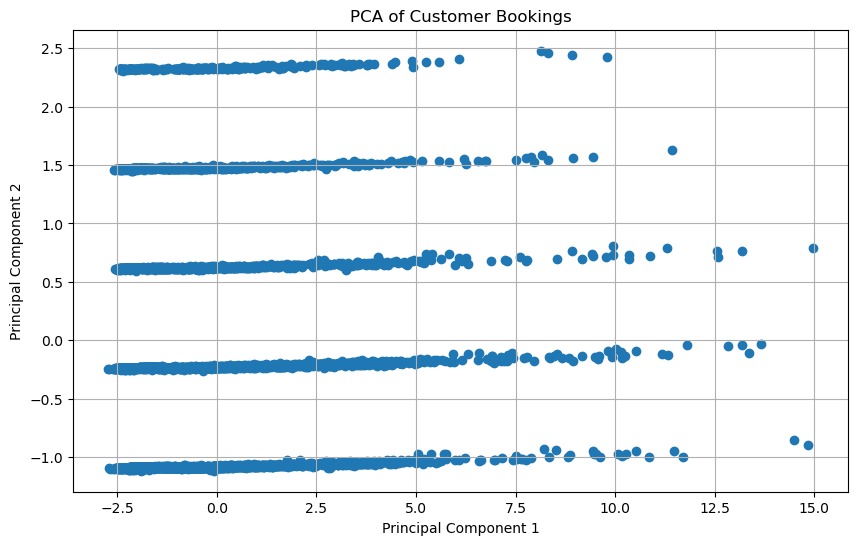

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA of Customer Bookings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [34]:
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loading_scores, index=features, columns=['PC1', 'PC2'])
print(loading_df)

                           PC1       PC2
distance_travelled    0.934971  0.000173
time_taken            0.822901 -0.009757
commission_base_cost  0.980091  0.005742
driver_base_cost      0.987541  0.007636
total_tax             0.987035  0.006736
total_trip_cost       0.987897  0.007539
ratings               0.019400 -0.999867


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

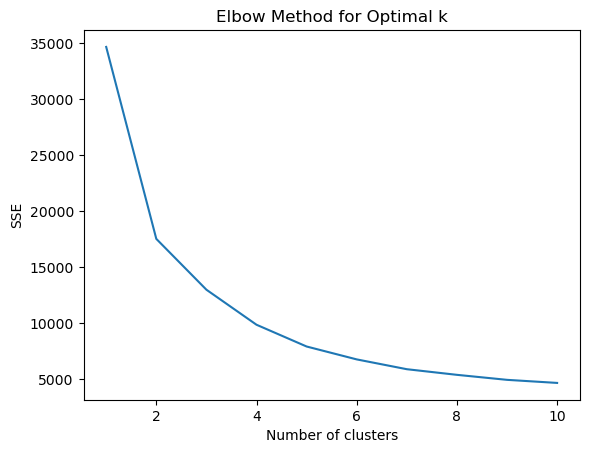

In [35]:
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()